In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns",None)

In [4]:
df = pd.read_excel('Data_Train.xlsx')
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [5]:
df.shape

(10683, 11)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [9]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [11]:
df.dropna(inplace=True)
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

## EDA

In [14]:
# extracting day from the date
df['Journey_Day'] = pd.to_datetime(df.Date_of_Journey, format='%d/%m/%Y').dt.day

In [15]:
# extracting month from the date, year is not required as the data is of 2019 only
df['Journey_Month'] = pd.to_datetime(df.Date_of_Journey, format='%d/%m/%Y').dt.month

In [17]:
df.drop('Date_of_Journey', axis=1, inplace=True)

In [18]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [19]:
# similarly, extracting the hours 
df['Dep_Hour'] = pd.to_datetime(df.Dep_Time).dt.hour

In [20]:
# extracting the minutes
df['Dep_Minutes'] = pd.to_datetime(df.Dep_Time).dt.minute

In [21]:
df.drop('Dep_Time', axis=1, inplace=True)

In [22]:
df.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_Hour,Dep_Minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,16,50


In [23]:
# similarly, extracting data from arrival
df['Arrival_Hour'] = pd.to_datetime(df.Arrival_Time).dt.hour
df['Arrival_Minutes'] = pd.to_datetime(df.Arrival_Time).dt.minute

In [24]:
df.drop('Arrival_Time', axis=1, inplace=True)

In [25]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_Hour,Dep_Minutes,Arrival_Hour,Arrival_Minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


In [26]:
df.Duration.value_counts()

2h 50m     550
1h 30m     386
2h 45m     337
2h 55m     337
2h 35m     329
          ... 
37h 10m      1
35h 20m      1
13h 35m      1
32h 55m      1
42h 5m       1
Name: Duration, Length: 368, dtype: int64

In [32]:
# formatting the duration column to get the info 
duration = list(df["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hrs = []
duration_mins = []
for i in range(len(duration)):
    duration_hrs.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

In [33]:
df['Duration_Hours'] = duration_hrs
df['Duration_Minutes'] = duration_mins

In [35]:
df.drop('Duration', axis=1, inplace=True)

In [36]:
df.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_Hour,Dep_Minutes,Arrival_Hour,Arrival_Minutes,Duration_Hours,Duration_Minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45


## Handeling Categorical Data

1. Nominal Data --> data in any order does not matter --> One Hot Encoding
2. Ordinal Data --> data in order is important --> Label Encoding

In [37]:
df.Airline.value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

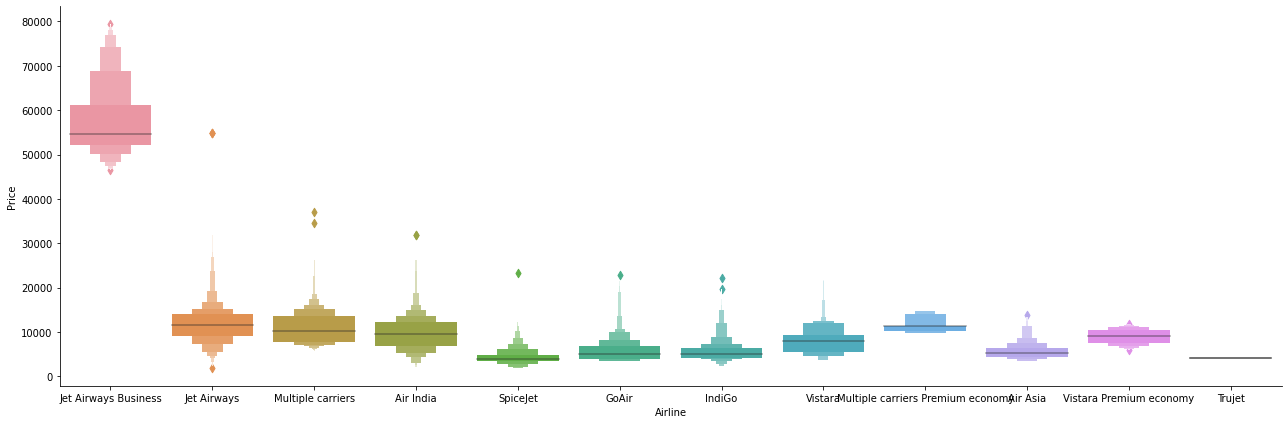

In [44]:
sns.catplot(x='Airline', y='Price', data=df.sort_values('Price', ascending=False), kind='boxen',height=6, aspect=3)
plt.show()

As we can see from the fig, Jet Airways Business has the highest price. Rest all are almost similar

In [46]:
# performing on hot encoding on airlines
Airlines = pd.get_dummies(df.Airline, drop_first=True)
Airlines.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [47]:
df.Source.value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

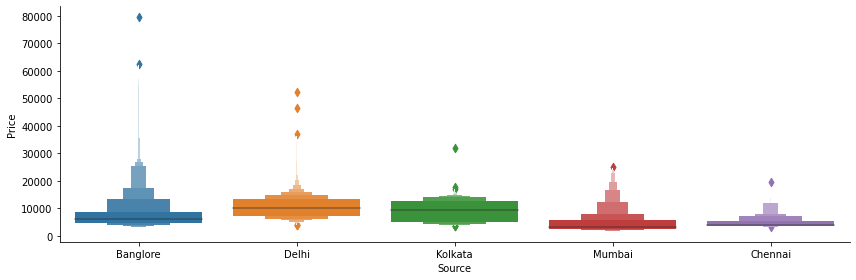

In [48]:
sns.catplot(x='Source', y='Price', data=df.sort_values('Price', ascending=False), kind='boxen',height=4, aspect=3)
plt.show()

In [67]:
# performing on hot encoding on source
Source = df[["Source"]]
Source = pd.get_dummies(Source, drop_first=True)
Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [68]:
# similarly, performing on hot encoding on destination
Destination = df[["Destination"]]
Destination = pd.get_dummies(Destination, drop_first=True)
Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [52]:
df.Additional_Info.value_counts()

No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

In [53]:
# as more than 80% data contains 'no info', dropping this column
df.drop('Additional_Info', axis=1, inplace=True)

In [59]:
df.Total_Stops.value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [60]:
# performing labelEncoder on total stops as no. of stops increase, price increases.

df.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace=True)

In [61]:
df.head()

,Airline,Source,Destination,Route,Total_Stops,Price,Journey_Day,Journey_Month,Dep_Hour,Dep_Minutes,Arrival_Hour,Arrival_Minutes,Duration_Hours,Duration_Minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,0,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1,13302,1,3,16,50,21,35,4,45


In [69]:
# concatinating the dataframes
f_data = pd.concat([df,Airlines,Source,Destination], axis=1)
f_data.head()

,Airline,Source,Destination,Route,Total_Stops,Price,Journey_Day,Journey_Month,Dep_Hour,Dep_Minutes,Arrival_Hour,Arrival_Minutes,Duration_Hours,Duration_Minutes,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,Banglore,New Delhi,BLR → DEL,0,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2,7662,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2,13882,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1,6218,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1,13302,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [71]:
f_data.drop(['Airline','Source','Destination'], axis=1, inplace=True)

In [73]:
f_data.drop('Route',axis=1, inplace=True)

In [74]:
f_data.head()

,Total_Stops,Price,Journey_Day,Journey_Month,Dep_Hour,Dep_Minutes,Arrival_Hour,Arrival_Minutes,Duration_Hours,Duration_Minutes,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [75]:
f_data.shape

(10682, 30)

## Feature Selection

In [77]:
x = f_data.drop('Price', axis=1)
x.head()

,Total_Stops,Journey_Day,Journey_Month,Dep_Hour,Dep_Minutes,Arrival_Hour,Arrival_Minutes,Duration_Hours,Duration_Minutes,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [81]:
y = f_data['Price']
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

In [86]:
# seeing the important features
from sklearn.ensemble import ExtraTreesRegressor
imp = ExtraTreesRegressor()
imp.fit(x,y)

ExtraTreesRegressor()

In [87]:
print(imp.feature_importances_)

[2.22320346e-01 1.43480907e-01 5.35130134e-02 2.44437038e-02
 2.08622819e-02 2.78955466e-02 1.92238708e-02 1.28096040e-01
 1.78764342e-02 1.08791764e-02 1.88042500e-03 1.68291612e-02
 1.38668710e-01 6.77099750e-02 1.90231826e-02 8.46366472e-04
 2.84571631e-03 9.68622666e-05 5.13782656e-03 8.63818468e-05
 3.45946679e-04 7.43058068e-03 3.45468397e-03 6.96842636e-03
 1.48525598e-02 1.40592468e-02 6.06503217e-03 4.60007880e-04
 2.46475879e-02]


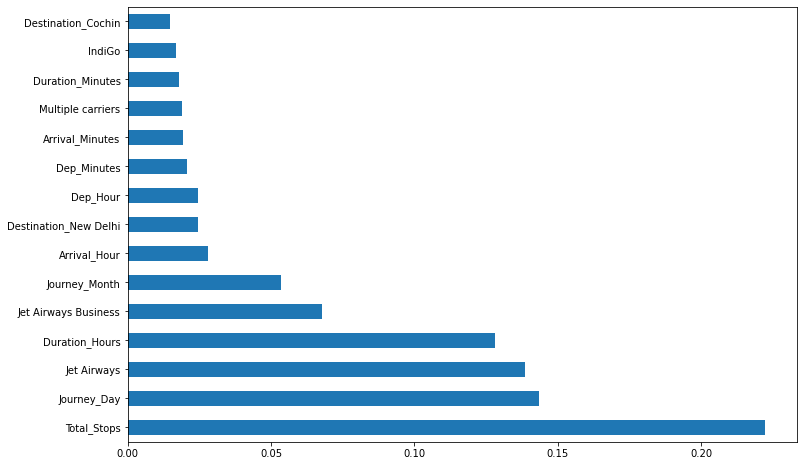

In [88]:
plt.figure(figsize = (12,8))
feat_importances = pd.Series(imp.feature_importances_, index=x.columns)
feat_importances.nlargest(15).plot(kind='barh')
plt.show()

## Random Forest

In [90]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [91]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

In [93]:
rf = RandomForestRegressor()

In [92]:
params = {
    'n_estimators'             : [int(x) for x in np.linspace(start=100, stop=1200, num=12)],
    'max_features'             : ['auto','sqrt','log2'],
    'min_samples_split'        : [2, 5, 7, 9, 10, 15, 20, 50, 100],
    'min_weight_fraction_leaf' :[0.0,0.05,0.5],
    'min_samples_leaf'         :[1, 2, 3, 5, 10],
    'max_depth'                : [int(x) for x in np.linspace(start=5, stop=30, num=6)]
}

In [94]:
rf_grid = RandomizedSearchCV(rf,params, cv=5, n_iter=10, verbose=2, random_state=42)

In [95]:
rf_grid.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=300, min_weight_fraction_leaf=0.0, min_samples_split=2, min_samples_leaf=5, max_features=log2, max_depth=25 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=300, min_weight_fraction_leaf=0.0, min_samples_split=2, min_samples_leaf=5, max_features=log2, max_depth=25, total=   1.6s
[CV] n_estimators=300, min_weight_fraction_leaf=0.0, min_samples_split=2, min_samples_leaf=5, max_features=log2, max_depth=25 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.5s remaining:    0.0s


[CV]  n_estimators=300, min_weight_fraction_leaf=0.0, min_samples_split=2, min_samples_leaf=5, max_features=log2, max_depth=25, total=   1.5s
[CV] n_estimators=300, min_weight_fraction_leaf=0.0, min_samples_split=2, min_samples_leaf=5, max_features=log2, max_depth=25 
[CV]  n_estimators=300, min_weight_fraction_leaf=0.0, min_samples_split=2, min_samples_leaf=5, max_features=log2, max_depth=25, total=   1.5s
[CV] n_estimators=300, min_weight_fraction_leaf=0.0, min_samples_split=2, min_samples_leaf=5, max_features=log2, max_depth=25 
[CV]  n_estimators=300, min_weight_fraction_leaf=0.0, min_samples_split=2, min_samples_leaf=5, max_features=log2, max_depth=25, total=   1.5s
[CV] n_estimators=300, min_weight_fraction_leaf=0.0, min_samples_split=2, min_samples_leaf=5, max_features=log2, max_depth=25 
[CV]  n_estimators=300, min_weight_fraction_leaf=0.0, min_samples_split=2, min_samples_leaf=5, max_features=log2, max_depth=25, total=   1.5s
[CV] n_estimators=400, min_weight_fraction_leaf=0.5

[CV]  n_estimators=500, min_weight_fraction_leaf=0.05, min_samples_split=50, min_samples_leaf=10, max_features=auto, max_depth=15, total=   3.7s
[CV] n_estimators=500, min_weight_fraction_leaf=0.05, min_samples_split=50, min_samples_leaf=10, max_features=auto, max_depth=15 
[CV]  n_estimators=500, min_weight_fraction_leaf=0.05, min_samples_split=50, min_samples_leaf=10, max_features=auto, max_depth=15, total=   3.7s
[CV] n_estimators=500, min_weight_fraction_leaf=0.05, min_samples_split=50, min_samples_leaf=10, max_features=auto, max_depth=15 
[CV]  n_estimators=500, min_weight_fraction_leaf=0.05, min_samples_split=50, min_samples_leaf=10, max_features=auto, max_depth=15, total=   3.8s
[CV] n_estimators=300, min_weight_fraction_leaf=0.05, min_samples_split=7, min_samples_leaf=5, max_features=sqrt, max_depth=25 
[CV]  n_estimators=300, min_weight_fraction_leaf=0.05, min_samples_split=7, min_samples_leaf=5, max_features=sqrt, max_depth=25, total=   0.9s
[CV] n_estimators=300, min_weight_

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  1.9min finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 3, 5, 10],
                                        'min_samples_split': [2, 5, 7, 9, 10,
                                                              15, 20, 50, 100],
                                        'min_weight_fraction_leaf': [0.0, 0.05,
                                                                     0.5],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, ver

In [96]:
rf_grid.best_params_

{'n_estimators': 1200,
 'min_weight_fraction_leaf': 0.0,
 'min_samples_split': 15,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 25}

In [97]:
rf_grid.best_score_

0.7741795442660762

In [98]:
y_pred = rf_grid.predict(X_test)

<AxesSubplot:xlabel='Price'>

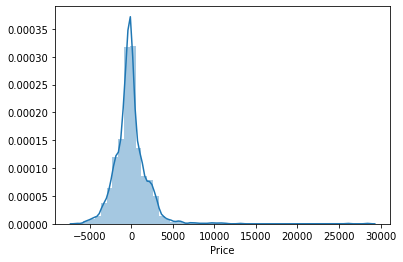

In [99]:
sns.distplot(y_test - y_pred)

In [100]:
# evaluation metrics
from sklearn import metrics
from sklearn.metrics import r2_score

In [101]:
print('ACCURACY: ', r2_score(y_test, y_pred))
print('----------------------------')
print('MAE: ', metrics.mean_absolute_error(y_test, y_pred))
print('MSE: ', metrics.mean_squared_error(y_test, y_pred))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

ACCURACY:  0.8084069657511008
----------------------------
MAE:  1310.5370560463389
MSE:  4131139.7957918234
RMSE:  2032.520552366402


### Save the model to reuse it again

In [103]:
import pickle

file = open('rf_model.pkl','wb')
pickle.dump(rf_grid, file)

In [1]:
pip freeze

absl-py==0.10.0
alabaster==0.7.12
anaconda-client==1.7.2
anaconda-navigator==1.9.12
anaconda-project==0.8.3
argh==0.26.2
asn1crypto==1.3.0
astroid==2.4.2
astropy==4.0
astunparse==1.6.3
atomicwrites==1.3.0
attrs==19.3.0
autopep8==1.4.4
Babel==2.8.0
backcall==0.1.0
backports.functools-lru-cache==1.6.1
backports.shutil-get-terminal-size==1.0.0
backports.tempfile==1.0
backports.weakref==1.0.post1
bcrypt==3.1.7
beautifulsoup4==4.8.2
bitarray==1.2.1
bkcharts==0.2
bleach==3.1.0
bokeh==1.4.0
boto==2.49.0
boto3==1.15.0
botocore==1.18.0
Bottleneck==1.3.2
cachetools==4.1.1
certifi==2020.6.20
cffi==1.14.0
chardet==3.0.4
click==7.1.2
cloudpickle==1.3.0
clyent==1.2.2
colorama==0.4.3
comtypes==1.1.7
conda==4.8.4
conda-build==3.18.11
conda-package-handling==1.6.0
conda-verify==3.4.2
contextlib2==0.6.0.post1
cryptography==2.8
cycler==0.10.0
Cython==0.29.14
cytoolz==0.10.1
dask==2.11.0
decorator==4.4.1
defusedxml==0.6.0
diff-match-patch==20181111
distributed==2.11.0
docutils==0.16
entrypoints==0.3
et-xm